# Supplier Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('supplier_data.csv')
raw_data.head()

,supplier,product,non-substitutability,Limited_Suppliers,Complexity,Restricted_Capacity,Price_Fluctuation,Quantity,price
0,supplier1,product_1,0.340068,0.157823,0.147229,0.345417,0.818180,710,360
1,supplier1,product_2,0.707724,0.632224,0.906938,0.987675,0.134605,2997,2740
2,supplier1,product_3,0.809439,0.837574,0.572990,0.719656,0.745230,3917,2919
3,supplier1,product_4,0.160944,0.623012,0.322081,0.740910,0.646308,3827,3246
4,supplier1,product_5,0.449052,0.307210,0.510034,0.462113,0.511406,3882,3596


In [3]:
raw_data['risk'] = raw_data[raw_data.columns[2:6]].sum(axis=1)
raw_data['spend'] = raw_data['Quantity']* raw_data['price']
raw_data_clean = raw_data.iloc[:,[0,1,9,10]].copy()
raw_data_clean

,supplier,product,risk,spend
0,supplier1,product_1,0.990537,255600
1,supplier1,product_2,3.234561,8211780
2,supplier1,product_3,2.939659,11433723
3,supplier1,product_4,1.846947,12422442
4,supplier1,product_5,1.728408,13959672
5,supplier1,product_6,1.093237,3358971
6,supplier2,product_7,2.256042,9281363
7,supplier2,product_8,2.084861,622800
8,supplier2,product_9,2.281233,1210796
9,supplier2,product_10,1.014658,932501


In [4]:
mx = np.mean(raw_data_clean.spend)
my = 2.5

def kralic_matrix(i, j):
    if i < mx and j < my:
        return 'Tactical'
    elif i < mx and j >= my:
        return 'Critical'
    elif i >= mx and j < my:
        return 'Leverage'
    else:
        return 'Strategic'

# Unit07-Chapter02
raw_data_clean['Kraljic'] = list(
    map(kralic_matrix, raw_data_clean.spend, raw_data_clean.risk))

raw_data_clean.head()

,supplier,product,risk,spend,Kraljic
0,supplier1,product_1,0.990537,255600,Tactical
1,supplier1,product_2,3.234561,8211780,Strategic
2,supplier1,product_3,2.939659,11433723,Strategic
3,supplier1,product_4,1.846947,12422442,Leverage
4,supplier1,product_5,1.728408,13959672,Leverage


In [5]:
raw_data_clean.Kraljic.value_counts()

Tactical     12
Leverage      9
Strategic     2
Critical      1
Name: Kraljic, dtype: int64

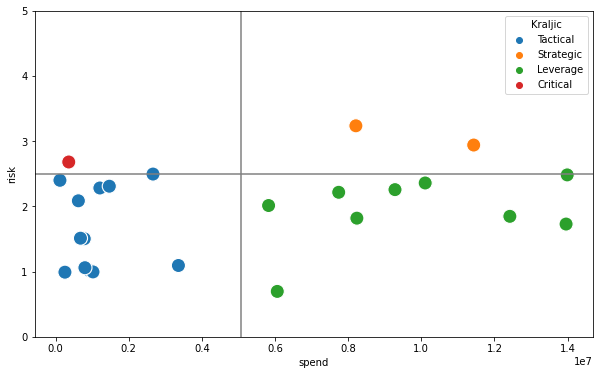

In [6]:
plt.figure(figsize=(10, 6))
fig = sns.scatterplot(data=raw_data_clean, x='spend', y='risk', hue='Kraljic',s=200)
plt.ylim(0, 5)
plt.axhline(2.5, c='gray')
plt.axvline(mx, c='gray');
# plt.savefig('fig.png', dpi=900)

In [7]:
raw_data_clean[raw_data_clean.Kraljic == 'Strategic']

,supplier,product,risk,spend,Kraljic
1,supplier1,product_2,3.234561,8211780,Strategic
2,supplier1,product_3,2.939659,11433723,Strategic
